## Loan Default Analysis

In [1]:
# importing important libraries
import numpy as np , pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# importing data set
loan = pd.read_csv('C:/Users/Lenovo/Downloads/upGrad Notes/EDA/Case Study- Gramener (Risk Analysis)/loan.csv')

## Understanding data

In [4]:
#looking at the top rows of the data set
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#checking all the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
#checking shape
loan.shape

(39717, 111)

#### There are many columns in this data set, but some of the important columns thet we need for the analysis are 'loan amount', 'grade', 'interest rate', term, loan status, etc.
#### Here loan status is our target variable and we need to understand how other variables affect the loan status.

## Data Cleaning


In [7]:
#checking null values in each columns
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
#percentage of null values
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

#### Some columns have more than 60 % null values, some even have 100% null values. We need to drop the columns with more than 80% null values.


In [9]:
# dropping columns with more than 80% null values
null_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index))>80]
null_columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [10]:
loan = loan.drop(null_columns, axis =1)

In [11]:
#checking shape 
loan.shape

(39717, 55)

In [12]:
# checking percentage of missing values again
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

#### There are still 2 columns namely 'desc' and 'mths_since_last_delinq' with more than 30% and 60% missing values respectively.

In [13]:
# analysing these columns
loan.desc.head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [14]:
loan.mths_since_last_delinq.head()

0     NaN
1     NaN
2     NaN
3    35.0
4    38.0
Name: mths_since_last_delinq, dtype: float64

#### The desc column is the description given by borrower as the reason for applying for the loan. It cannot be used to serve our purpose. Hence, we will not use this column.
#### Similarly mths_since_last_delinq column represents the number of months passed since the customer fell into days past due category.
#### This data is only generated after several month of loan appproval. So it will not help us in predicting the loan defaulters.

In [15]:
# dropping these columns
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis =1)

In [16]:
# checking missing values again
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

#### There are still some missing values in some columns but we can ignore them for now.

In [17]:
#checking missing values in rows
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [18]:
#checking for rows with more than 5 missing values.
len(loan[loan.isnull().sum(axis=1)>5].index)

0

#### Before starting analysis lets check if all the columns are in proper format.

In [19]:
# checking whether all columns are in proper format
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [20]:
# the int_rate is of object type, it must be a float
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))

In [21]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [22]:
# emp_length is in object format and it also has over 2% null values
# removing null values
loan = loan[~loan['emp_length'].isnull()]

In [23]:
# extracting numericals from emp_length using regex function findall()
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

In [24]:
#converting to numerical
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [25]:
# checking the format again
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

#### Now the data seems in proper format and we have also dealt with null values. We can start with the analysis

# Data Analysis

### Objective 

#### The objective of the analysis is to predict the customers who are most likely to deafult on a loan. So that at the time of loan application we can approve/reject a loan based on this analysis.
#### The important variables that are available to us are:
#### 1) Demographic info of customer such as age, employment details, home ownership, etc.
#### 2) loan related info like loan amount, interest rate, duration of loan, reason for loan, etc.
Here we are also provided with customer behaviour data such as revolving balance, next payment, last payment, etc. But this data is 
only available after the loan has been approved, it cannot help us in predicting the defaulters before loan approval, especially if the 
customer is new. 
we will only be using demographic and loan related data, so its better to get rid of the customer behaviour data.

In [26]:
customer_behaviour = [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

In [27]:
# dropping customer behaviour 
loan_1 = loan.drop(customer_behaviour, axis = 1)
loan_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [28]:
# We will not be using data like addr_state, zip code, url etc.
# title coloumn is also of no use. we already have purpose column
# dropping these columns 
loan_1= loan_1.drop(['title', 'zip_code', 'addr_state' , 'url'], axis = 1)
loan_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [29]:
# Now we can finally focus on our target variable 'loan_status'
loan_1.loan_status.value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

###### This data would be more usefull in categorical form like 'F' for fully paid or 'C' for charged off or we can simply give it binary code like 0,1,   1 for charged off(defaulted), 0 otherwise.

In [30]:
loan_1['loan_status'] = loan_1['loan_status'].astype('category')

In [31]:
# We only need fully paid and charged off.
loan_1 = loan_1[loan_1['loan_status'] != 'Current']
loan_1['loan_status'] = loan_1['loan_status'].apply( lambda x: 0 if x == 'Fully Paid' else 1)

In [32]:
loan_1.loan_status.astype('int')

0        0
1        1
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: loan_status, Length: 37544, dtype: int32

In [33]:
loan_1.loan_status.value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

## Univariate Analysis

In [34]:
## Loan default rate
loan_1.loan_status.value_counts(normalize= True)

0    0.856195
1    0.143805
Name: loan_status, dtype: float64

#### so the default rate is roughly 14%

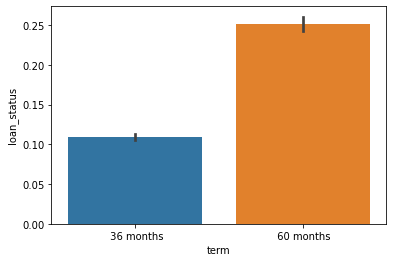

In [35]:
# Visualising default rate against categorica variables
sns.barplot(data= loan_1, x= 'term', y= 'loan_status')
plt.show()

##### loans with longer term have high default rate

In [36]:
# Now there are many categorical variable like term, grade, home ownership, etc.
# lets define a function to make the process a little easier.

def cate_plot(variable):
    sns.barplot(data= loan_1, x= variable , y= 'loan_status')
    plt.show()


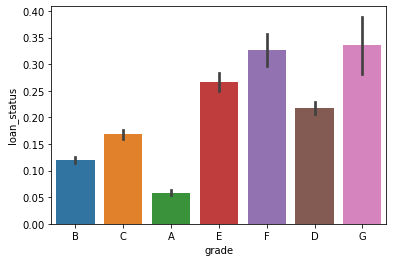

In [37]:
#comparing default rates across grades
cate_plot('grade')

##### Lower graded customers have higher default rate. The grades are based on the risk  involved with the customer.

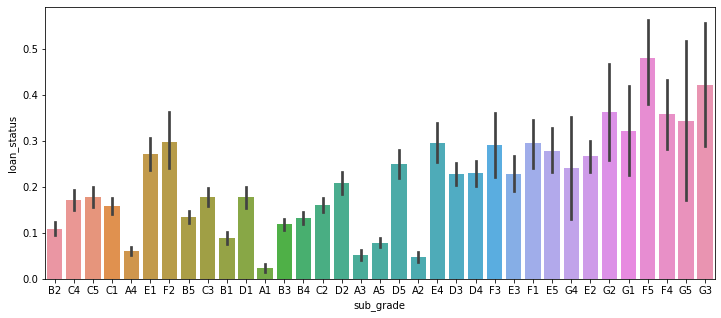

In [38]:
#comparing against sub grade
plt.figure(figsize= (12,5))
cate_plot('sub_grade')


#### As expected, as the rating number increases default rate also increases. (A1 is better than A2 better than A3 so on..)

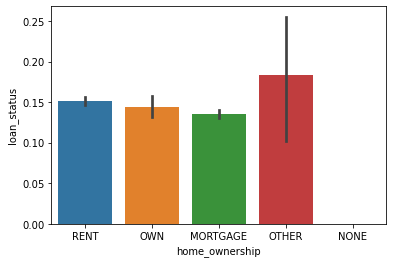

In [39]:
# comparing default rates against home ownership
cate_plot('home_ownership')

#### Default rates are not really affected by home ownership

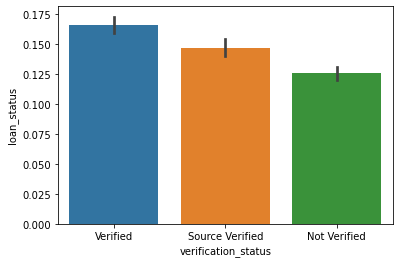

In [40]:
# comparing across verification status
cate_plot('verification_status')

#### The default rate is high among verified users as compared to non verified

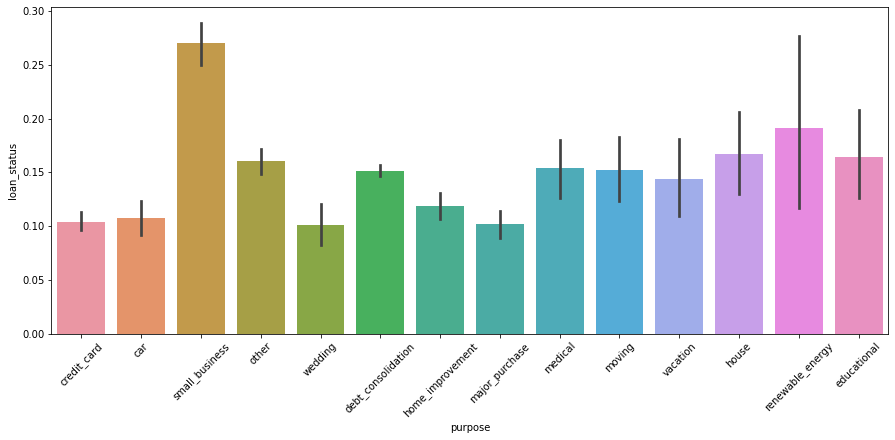

In [41]:
# comparing across purpose
plt.figure(figsize= (15,6))
plt.xticks(rotation = 45)
cate_plot('purpose')


#### The default rate is highest among small businesses followed by renewable energy then house and education loan.

In [42]:
loan_1.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [43]:
from datetime import datetime
loan_1['issue_d'] = loan_1['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [44]:
# Extracting year and month from issue_d 
loan_1['month'] = loan_1['issue_d'].apply(lambda x: x.month)
loan_1['year'] = loan_1['issue_d'].apply(lambda x: x.year)


In [45]:
# loans granted across years
loan_1.year.value_counts(ascending= True)

2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

#### Number of loans have significantly increased year after year.

In [46]:
# loans granted month wise
loan_1.month.value_counts()

12    4120
11    3890
10    3637
9     3394
8     3321
7     3253
6     3094
5     2838
4     2756
3     2632
1     2331
2     2278
Name: month, dtype: int64

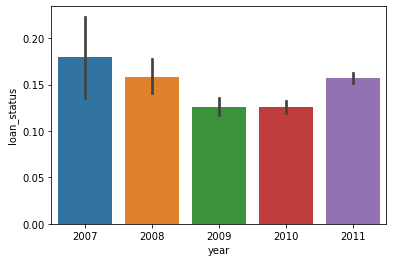

In [47]:
# lets visualize this inforation
# loan defaults across years
cate_plot('year')

#### 2011 sees a sudden spike in default rate after a decline from 2008 -2010


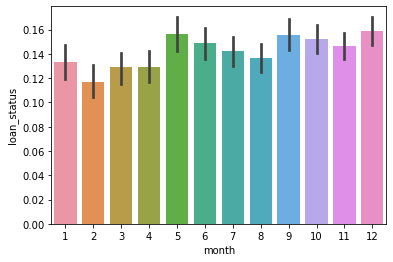

In [48]:
# loan defaults across months
cate_plot('month')

#### Not much variation across months

In [49]:
# now there are some continuous variables like loan_amnt, int_rates, funded_amnt_inv, etc.
# lets analyse them as well.

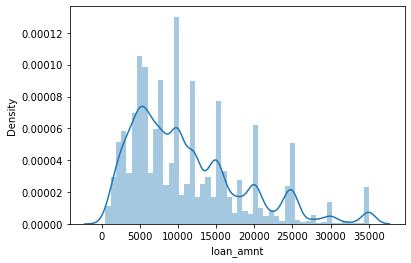

In [50]:
# visualizing loan amount
sns.distplot(loan_1['loan_amnt'])
plt.show()

#### So, median loan amount is around 10,000

In [51]:
# lets bucket (bin) this variable for a better understanding of the data.
# binning loan_amnt
loan_1['loan_amnt'] = pd.cut(loan_1.loan_amnt,[0,4999,14999,24999,999999999], labels= ['Low','Medium', 'High', 'Very high'])

In [52]:
loan_1.loan_amnt.value_counts()

Medium       20157
High          7572
Low           7095
Very high     2720
Name: loan_amnt, dtype: int64

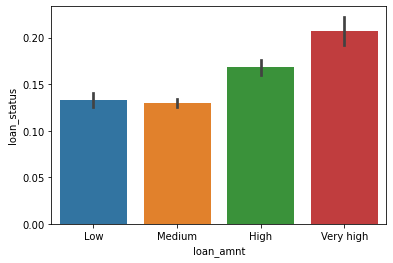

In [53]:
cate_plot('loan_amnt')

#### loans from very high category( loan amount over 25000) have the highest default rate, followed by high than medium and low.
#### So, higher the loan amount higher the default rate.

In [54]:
# creating buckets of funded amount invested
loan_1['funded_amnt_inv'] = pd.cut(loan_1.funded_amnt_inv, [0,4999,14999,24999,999999999], labels= ['Low','Medium', 'High', 'Very high'])

In [55]:
loan_1.funded_amnt_inv.value_counts()

Medium       20508
Low           8910
High          6661
Very high     1336
Name: funded_amnt_inv, dtype: int64

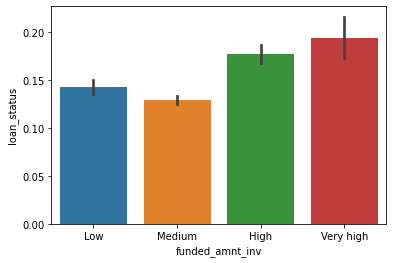

In [56]:
cate_plot('funded_amnt_inv')

#### High default rate where funded amount is in 'High' and 'Very high' category

In [57]:
loan_1.funded_amnt.describe()

count    37544.000000
mean     10853.560489
std       7096.316776
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [58]:
# Lets create buckets of funded_amount
loan_1['funded_amnt'] = pd.cut(loan_1.funded_amnt, [0,5000,15000,25000,999999999], labels= ['Low','Medium', 'High', 'Very high'])

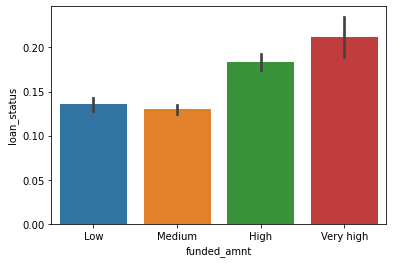

In [59]:
cate_plot('funded_amnt')

#### Similar pattern here as well

In [60]:
# creating buckets of int_rate
loan_1['int_rate'] = pd.cut(loan_1.int_rate, [0,10,15,99], labels= ['Low','Medium', 'High'])

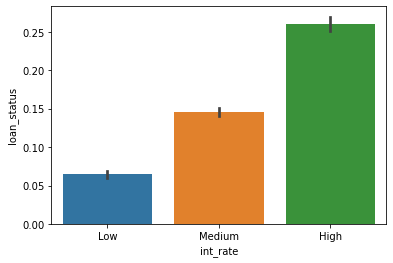

In [61]:
cate_plot('int_rate')

#### Loans with high interest rate have comparatively very high deafult rate than loans with medium and low interest rates.

In [62]:
# bucketing debt to income ratio
loan_1['dti'] = pd.cut(loan_1.dti, [0,10,20,999], labels= ['Low','Medium', 'High'])

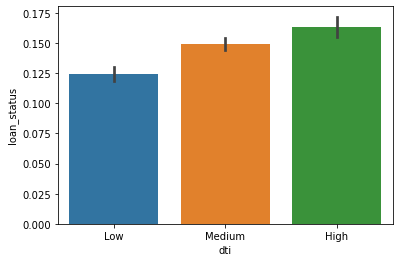

In [63]:
cate_plot('dti')

#### High dti results in high default rates

In [64]:
# Bucketing installment 
loan_1['installment'] = pd.cut(loan_1.installment, [0,200,400,600,9999], labels = ['Low','Medium','High','Very high'])

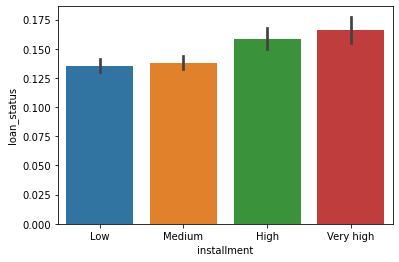

In [65]:
cate_plot('installment')

#### Higher the installment amount, higher the default rates.

In [66]:
#bucketing annual income
loan_1['annual_inc'] = pd.cut(loan_1.annual_inc, [0,50000,100000,150000,999999999999], labels = ['Low','Medium','High','Very high'])

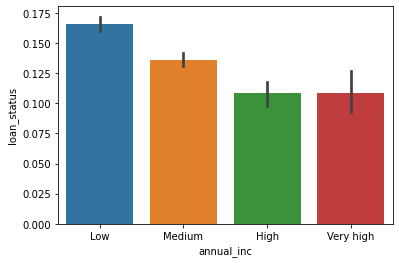

In [67]:
cate_plot('annual_inc')

#### lower the annual income, higher the default rates.

In [68]:
# bucketing employment length
loan_1['emp_length'] = pd.cut(loan_1.emp_length, [0,1,3,7,99], labels = ['Fresher','Junior','Senior','Expert'])

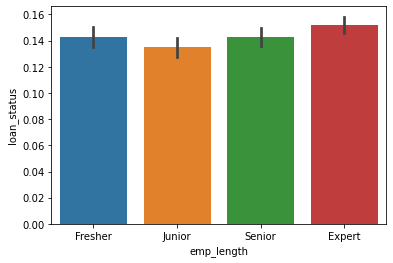

In [69]:
cate_plot('emp_length')

#### Not a huge differentiation.

## Segmented Univariate Analysis

Now we have compared default rates against various variables and some of the important variables that influence the default rates are- Grade, Term of loan, purpose of loan, interest rate, etc. 

Now, purpose of loan is the most important factor that influences the default rates.
Lets take a deeper look at the variable 'purpose'.

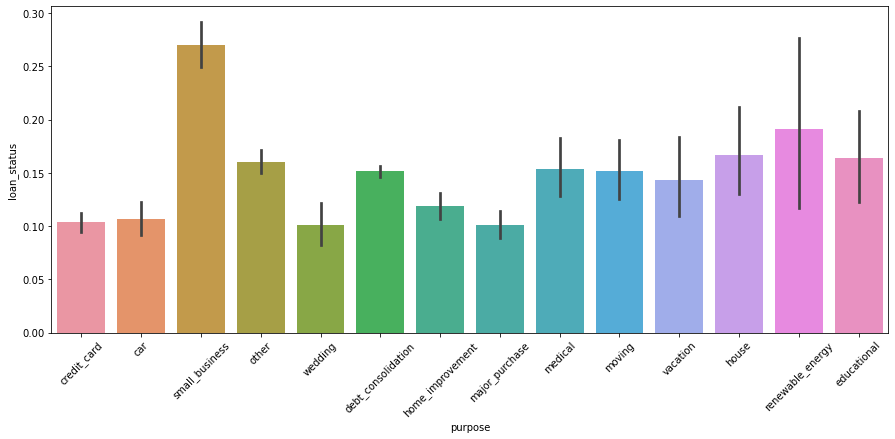

In [70]:
# analysing the variable 'purpose' again.
plt.figure(figsize= (15,6))
plt.xticks(rotation = 45)
cate_plot('purpose')

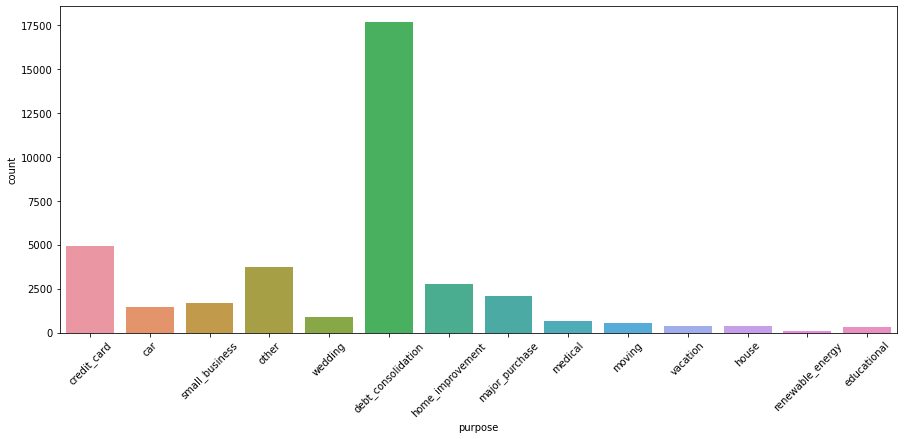

In [71]:
# Lets look at the most popular type of loan
plt.figure(figsize= (15,6))
plt.xticks(rotation = 45)
sns.countplot(loan_1.purpose)
plt.show()

#### So, most of the loans approved by the company are debt_consolidation loans (to pay other debts)

In [72]:
# Analysing top 5 types of loans based on purpose.
top5_purposes = ["debt_consolidation", "credit_card","home_improvement","major_purchase", "small_business"]
loan_1 = loan_1[loan_1['purpose'].isin(top5_purposes)]
loan_1.purpose.value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
small_business         1710
Name: purpose, dtype: int64

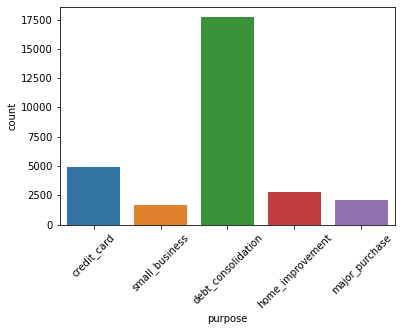

In [73]:
#Top 5 types of loans approved
sns.countplot(loan_1.purpose)
plt.xticks(rotation = 45)
plt.show()

## Multivariate Analysis

### Comparing the default rates across two types of categorical variables.


In [74]:
# As there are multiple categorical variables, lets define a function to make the task a little easier.
def plot_multi(variable):
    plt.figure(figsize = (12,6))
    sns.barplot(data = loan_1, x= variable, y= 'loan_status', hue = 'purpose')
    plt.show()

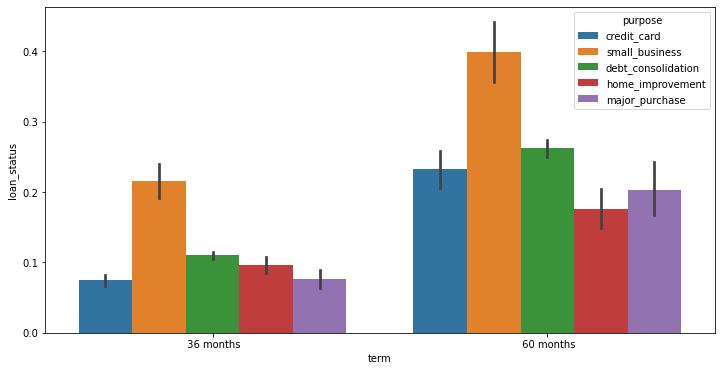

In [75]:
# comparing against term
plot_multi('term')


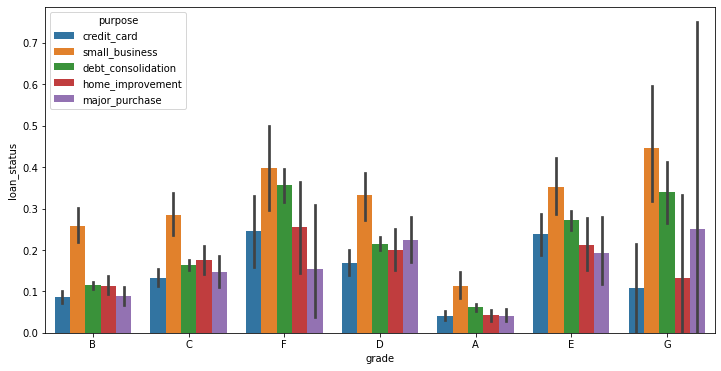

In [76]:
# grade of loan
plot_multi('grade')

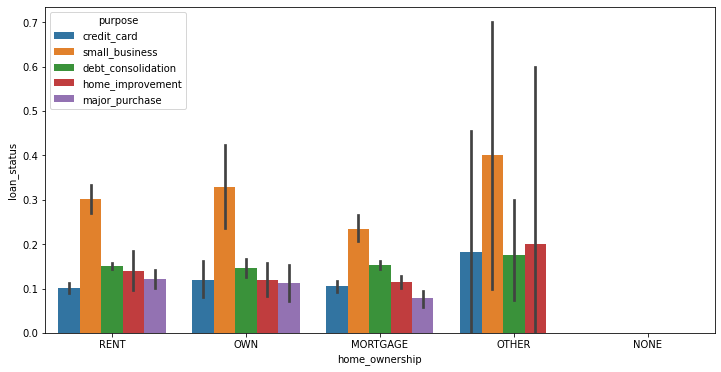

In [77]:
#home_ownership
plot_multi('home_ownership')

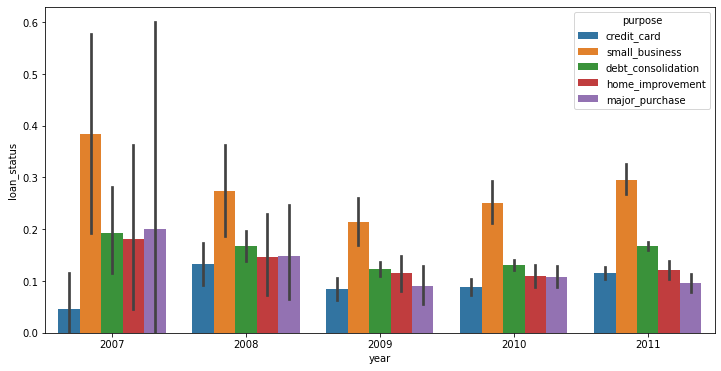

In [78]:
#year
plot_multi('year')

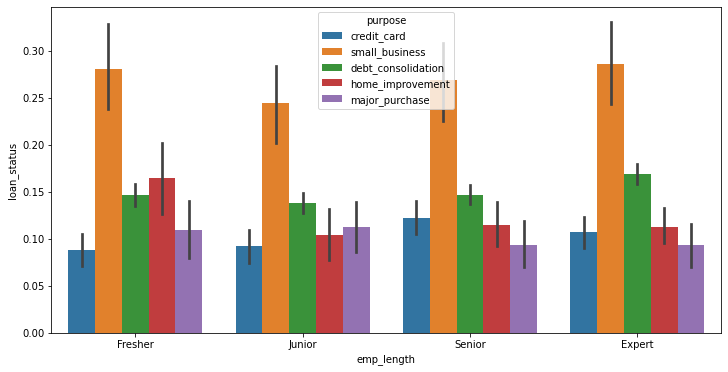

In [79]:
#employement length
plot_multi('emp_length')

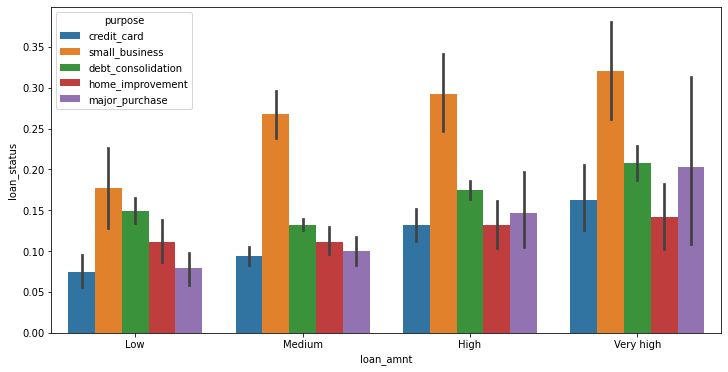

In [80]:
# loan amount
plot_multi('loan_amnt')

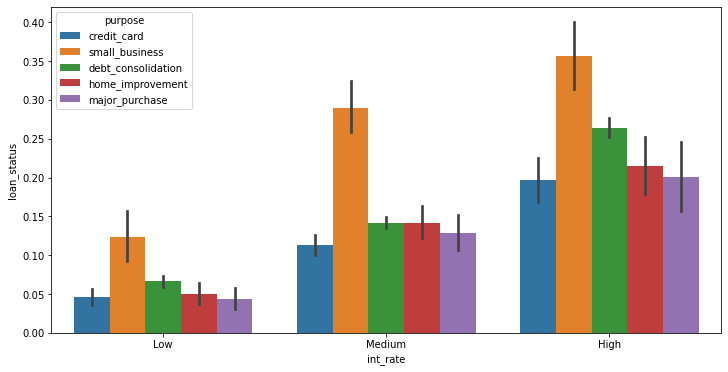

In [81]:
#interest rate
plot_multi('int_rate')

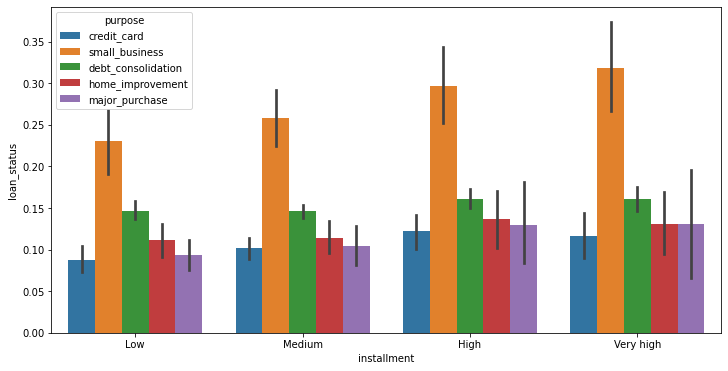

In [82]:
# installment
plot_multi('installment')

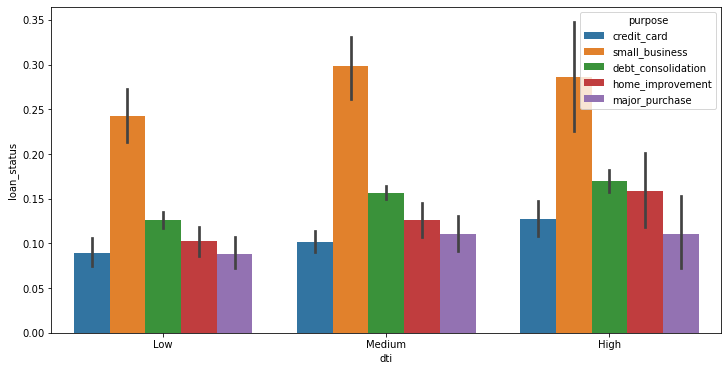

In [83]:
# debt to income ratio
plot_multi('dti')

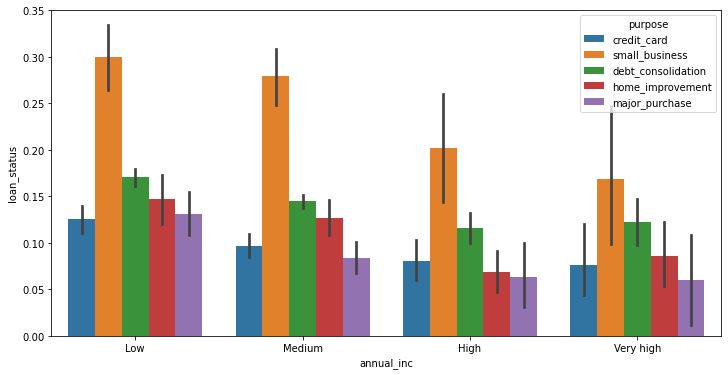

In [84]:
# annual income
plot_multi('annual_inc')

In [85]:
# Checking how much default rate varies across categories
# variation of default rate across annual_inc
loan_1.groupby('annual_inc').loan_status.mean().sort_values(ascending = False)

annual_inc
Low          0.165598
Medium       0.138809
Very high    0.107264
High         0.104553
Name: loan_status, dtype: float64

In [86]:
#lets define a function that calculates the average default rates across categories
#and also the difference between the highest default rate and the lowest.

def avg_default(variable):
    default_rates = loan_1.groupby(variable).loan_status.mean().sort_values(ascending = False)
    return (round(default_rates,2), round(default_rates[0] - default_rates[-1],2))


In [87]:
default_rates, avg = avg_default('annual_inc')
print(default_rates)
print(avg)


annual_inc
Low          0.17
Medium       0.14
Very high    0.11
High         0.10
Name: loan_status, dtype: float64
0.06


There is a 6% increase in default rate as we go from high to low annual income.

In [88]:
default_rates, avg = avg_default('grade')
print(default_rates)
print(avg)

grade
F    0.33
G    0.32
E    0.27
D    0.22
C    0.17
B    0.12
A    0.06
Name: loan_status, dtype: float64
0.28


There is 28 % increase in default rate as we go from grade A to grade F.

#### Similary we can enter different variables in the above function to get more insights.